In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fs = pd.read_csv('E:/working/DataMining/fangshan.csv')
fs = fs.drop(['weather', 'station_id', 'longitude', 'latitude'], axis=1)

# foucus on PM2.5

fs = fs.drop(['PM10', 'NO2', 'CO', 'O3', 'SO2'], axis = 1)
fs.head()

,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,PM2.5
0,2017-01-30 16:00:00,-2.6,1026.1,14,215.0,3.3,114.0
1,2017-01-30 17:00:00,-2.7,1025.8,15,217.0,3.5,116.0
2,2017-01-30 18:00:00,-2.8,1025.6,17,228.0,3.2,117.0
3,2017-01-30 19:00:00,-2.8,1025.0,18,228.0,1.8,118.0
4,2017-01-30 20:00:00,-3.1,1024.1,17,209.0,2.4,118.0


In [2]:
def feature_vector(df, feature, N):
    rows = df.shape[0]
    column_n = [None] * N + [df[feature][i - N] for i in range(N, rows)]
    column_name = "{}_{}".format(feature, N)
    df[column_name] = column_n

fs = fs.drop(['utc_time',], axis=1)

for feature in ['PM2.5', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed']:
    for N in range(1, 4):
        feature_vector(fs, feature, N)
        
fs = fs.drop(['temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed'], axis=1)
fs = fs[3:].reset_index(drop=True)
fs.head()

,PM2.5,PM2.5_1,PM2.5_2,PM2.5_3,temperature_1,temperature_2,temperature_3,pressure_1,pressure_2,pressure_3,humidity_1,humidity_2,humidity_3,wind_direction_1,wind_direction_2,wind_direction_3,wind_speed_1,wind_speed_2,wind_speed_3
0,118.0,117.0,116.0,114.0,-2.8,-2.7,-2.6,1025.6,1025.8,1026.1,17.0,15.0,14.0,228.0,217.0,215.0,3.2,3.5,3.3
1,118.0,118.0,117.0,116.0,-2.8,-2.8,-2.7,1025.0,1025.6,1025.8,18.0,17.0,15.0,228.0,228.0,217.0,1.8,3.2,3.5
2,106.0,118.0,118.0,117.0,-3.1,-2.8,-2.8,1024.1,1025.0,1025.6,17.0,18.0,17.0,209.0,228.0,228.0,2.4,1.8,3.2
3,110.0,106.0,118.0,118.0,-3.9,-3.1,-2.8,1023.9,1024.1,1025.0,19.0,17.0,18.0,216.0,209.0,228.0,1.7,2.4,1.8
4,122.0,110.0,106.0,118.0,-4.7,-3.9,-3.1,1023.2,1023.9,1024.1,23.0,19.0,17.0,233.0,216.0,209.0,0.4,1.7,2.4


In [3]:
fs.corr()[['PM2.5']].sort_values('PM2.5')

,PM2.5
wind_speed_2,-0.236955
wind_speed_3,-0.235846
wind_speed_1,-0.228198
temperature_1,-0.066844
temperature_2,-0.064278
temperature_3,-0.060171
wind_direction_3,-0.005863
wind_direction_1,-0.001854
wind_direction_2,-0.001517
pressure_1,0.001192


In [4]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'temperature_1', 'temperature_2', 'temperature_3',
              'pressure_1', 'pressure_2', 'pressure_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_direction_1', 'wind_direction_2', 'wind_direction_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']

X = fs[features]
y = fs[['PM2.5']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6056, 18)
(6056, 1)
(2019, 18)
(2019, 1)


D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)
print(LinearModel.intercept_)
print(LinearModel.coef_)


[-90.42301382]
[[ 0.75731722  0.16890637  0.01785279  0.6810454  -0.6495115   0.06329199
  -0.0882468  -0.08511385  0.27112631  0.24780554 -0.19803759 -0.09960994
  -0.00470224  0.00294165 -0.0021895  -1.5207328  -0.47985265  0.50055359]]


In [6]:
y_prediction = LinearModel.predict(X_test)
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_prediction))

199.993655561


In [7]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'temperature_1', 'temperature_2', 'temperature_3',
              'pressure_1', 'pressure_2', 'pressure_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']

X = fs[features]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(LinearModel, X, y, cv=10)
print(metrics.mean_squared_error(y, predicted))

418.043156979


In [8]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3']

X = fs[features]
predicted = cross_val_predict(LinearModel, X, y, cv=10)
print(metrics.mean_squared_error(y, predicted))

427.305812557


In [9]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'temperature_1', 'temperature_2', 'temperature_3',
              'pressure_1', 'pressure_2', 'pressure_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_direction_1', 'wind_direction_2', 'wind_direction_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']
X = fs[features]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(LinearModel, X, y, cv=10)
print(metrics.mean_squared_error(y, predicted))

418.325257364


In [10]:
features = ['PM2.5_1', 'PM2.5_2', 'PM2.5_3',
              'humidity_1','humidity_2', 'humidity_3',
              'wind_speed_1', 'wind_speed_2', 'wind_speed_3']

X = fs[features]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(LinearModel, X, y, cv=10)
print(metrics.mean_squared_error(y, predicted))

418.244306554


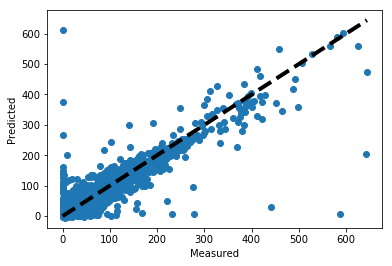

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
